# **Random Forests** #

**Regression**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Loading Dataset**

In [2]:
df = pd.read_csv("../../Datasets/energy_efficiency.csv")

df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


**Checking for Duplicates and Missing Values**

In [3]:
print(df.isnull().sum().sum())

0


In [4]:
print(df.duplicated().sum())

0


**Train/Test Split**

In [19]:
#Defining the dataset into X & Y 

X = df.drop(["heating_load", "cooling_load"], axis=1)
y = df[["heating_load"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


**Random Forest Model**

In [20]:
model = make_pipeline(StandardScaler(), RandomForestRegressor())
model.fit(X_train, y_train)

c:\Users\stsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

**Metrics**

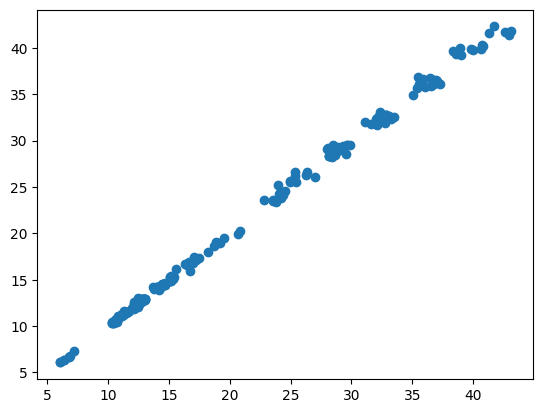

In [21]:
#making test predictions 
predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.show()

We can see that plot is following a strict linear line which shows that the model is working really well and even better than previous models and it is also tackling the clusering issue due to specific building specification in earlier models.

In [22]:
#heating load metrics

# MAE - Mean average error
print("Heating Load Metrics:")
print("\nMAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2))

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2))

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

# R-squared. 0 =bad  1 =good
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))


Heating Load Metrics:

MAE
0.29

MSE
0.18

RMSE:
0.42

R-squared:
1.0


The metrics show that model is performing really well.

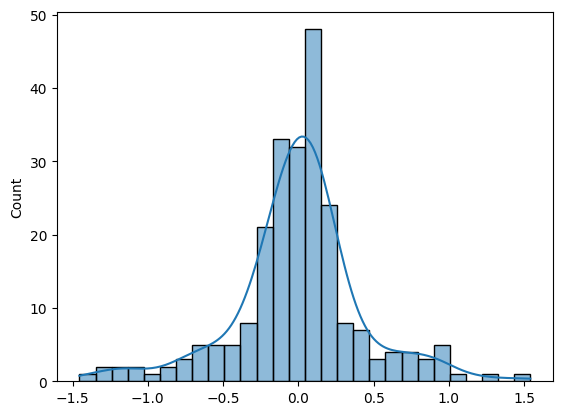

In [23]:
sns.histplot(pd.Series(y_test.values.flatten()) - pd.Series(predictions.flatten()), kde=True)
plt.show()


We can see a normal distribution here

In [24]:
df.tail()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
763,0.64,784.0,343.0,220.5,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4.0,0.4,5.0,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5.0,0.4,5.0,16.64,16.03


In [26]:
sample = pd.DataFrame({
    'relative_compactness': [0.64],
    'surface_area': [784.0],
    'wall_area': [343.0],
    'roof_area': [220.5],
    'overall_height': [3.5],
    'orientation': [5.0],
    'glazing_area': [0.4],
    'glazing_area_distribution': [5.0]
})

prediction = model.predict(sample)
scaled_heating_load = prediction[0]

heating_load = scaled_heating_load

print(f"Heating Load: {heating_load:.2f}")


Heating Load: 18.03


**Summary**

We have imported all the libraries first then we imported the data and checked for duplicates and missing values. We performed Train/Test split and trained the model and checked the metrics which performed really well compared to previous models showing that Random Forests performs really well in most cases.